In [18]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [22]:
f = uproot.open("output_ggHH_SM_minMassDist.root")['bbbbTree']
branches = f.keys()
#print(branches)
df = f.arrays(branches,library="pd")
nEvents = len(df)

/uscms_data/d3/sbrightt/miniconda3/envs/cmsdas22-long/lib/python3.8/site-packages/uproot/interpretation/library.py:806: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


gen mH1 mean = 118.4066162109375, RMS = 11.076214790344238
gen mH2 mean = 114.0168685913086, RMS = 13.617650032043457


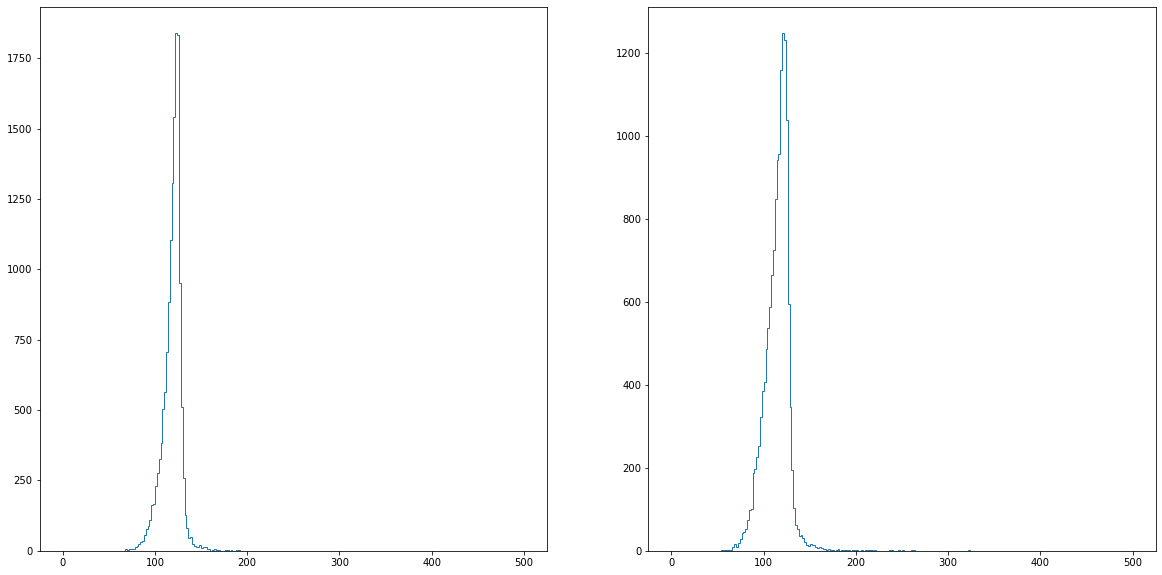

In [23]:
tru = (df["allJets_truMatch"] == True) & (df["n_btag"] == 4)
plt.figure(1,(20,10))
h1_gen_m = df[tru]["truMatch_H1_m_gen"].values
h2_gen_m = df[tru]["truMatch_H2_m_gen"].values
plt.subplot(121)
h1 = plt.hist(h1_gen_m,bins=np.arange(0,502,step=2),histtype="step")
plt.subplot(122)
h2 = plt.hist(h2_gen_m,bins=np.arange(0,502,step=2),histtype="step")
print("gen mH1 mean = {0}, RMS = {1}".format(np.mean(h1_gen_m),np.std(h1_gen_m)))
print("gen mH2 mean = {0}, RMS = {1}".format(np.mean(h2_gen_m),np.std(h2_gen_m)))

no breg:
2.128725
-0.2256516
with breg:
8.123882
8.190785


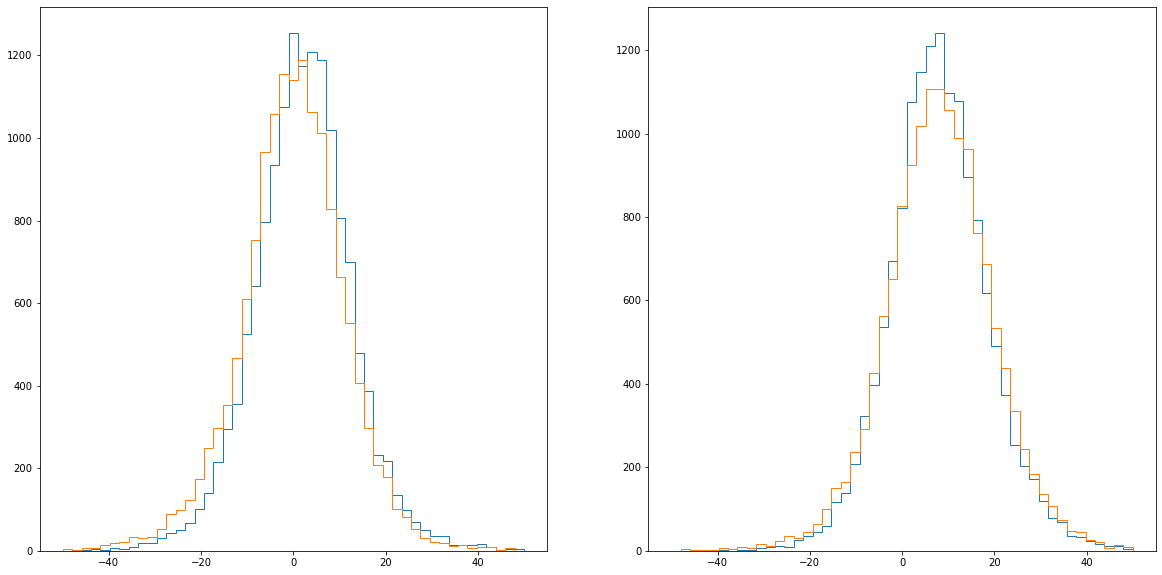

In [21]:
tru = (df["allJets_truMatch"] == True) & (df["n_btag"] == 4)

h1_m_truMatch = df[tru]["truMatch_H1_m"].values
h2_m_truMatch = df[tru]["truMatch_H2_m"].values
h1_m_truMatch_breg = df[tru]["truMatch_H1_m_breg"].values
h2_m_truMatch_breg = df[tru]["truMatch_H2_m_breg"].values
h1_m_gen = df[tru]["truMatch_H1_m_gen"].values
h2_m_gen = df[tru]["truMatch_H2_m_gen"].values

dm1 = h1_m_truMatch - h1_m_gen
dm2 = h2_m_truMatch - h2_m_gen
dm1_breg = h1_m_truMatch_breg - h1_m_gen
dm2_breg = h2_m_truMatch_breg - h2_m_gen

plt.figure(1,(20,10))
plt.subplot(121)
h1 = plt.hist(dm1,bins=np.linspace(-50,50),histtype='step')
h2 = plt.hist(dm2,bins=np.linspace(-50,50),histtype='step')
plt.subplot(122)
h3 = plt.hist(dm1_breg,bins=np.linspace(-50,50),histtype='step')
h4 = plt.hist(dm2_breg,bins=np.linspace(-50,50),histtype='step')

print("no breg:")
print(dm1.mean())
print(dm2.mean())
print("with breg:")
print(dm1_breg.mean())
print(dm2_breg.mean())

Peak is at m_H1 = 125.0000, m_H2 = 121.0000


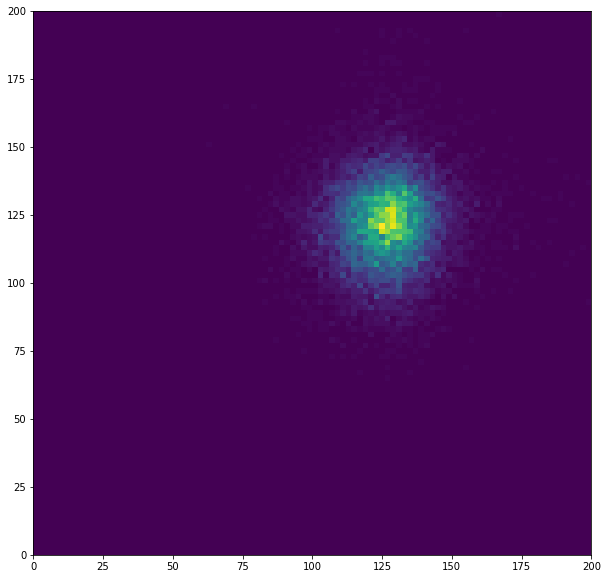

In [9]:
bins = np.arange(0,202,step=2)
plt.figure(figsize=(10,10))
h12 = plt.hist2d(h1_m_truMatch_breg,h2_m_truMatch_breg,bins=bins)
max_ind = np.unravel_index(np.argmax(h12[0]),h12[0].shape)
x = (h12[1][:-1] + h12[1][1:])/2
y = (h12[2][:-1] + h12[2][1:])/2
print("Peak is at m_H1 = {0:.4f}, m_H2 = {1:.4f}".format(x[max_ind[0]],y[max_ind[1]]))
mH1_0 = x[max_ind[0]]
mH2_0 = y[max_ind[1]]

In [10]:
print("means with b-reg")
print(h1_m_truMatch_breg.mean())
print(h2_m_truMatch_breg.mean())
print("medians with b-reg")
print(np.median(h1_m_truMatch_breg))
print(np.median(h2_m_truMatch_breg))

means with b-reg
126.5305
122.20765
medians with b-reg
126.812065
122.36877


In [65]:
len(h1_m_truMatch)

20198

In [71]:
16785/20198

0.8310228735518368